<a href="https://colab.research.google.com/github/na-learning/ML-Trees-and-Forests/blob/main/Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

1. Use load_breast_cancer to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.

In [31]:
# Load the Breast Cancer Wisconsin dataset

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df = df.dropna(how="any")


In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [33]:
# Display first 5 rows
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


1. Use Scikit-Learn's DecisionTreeClassifier to fit a model on the training data.
2. Visualize the resulting tree using plot_tree.
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [34]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:

    clf = DecisionTreeClassifier(max_depth = depth,
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

<ipython-input-35-8dc907abb6e7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


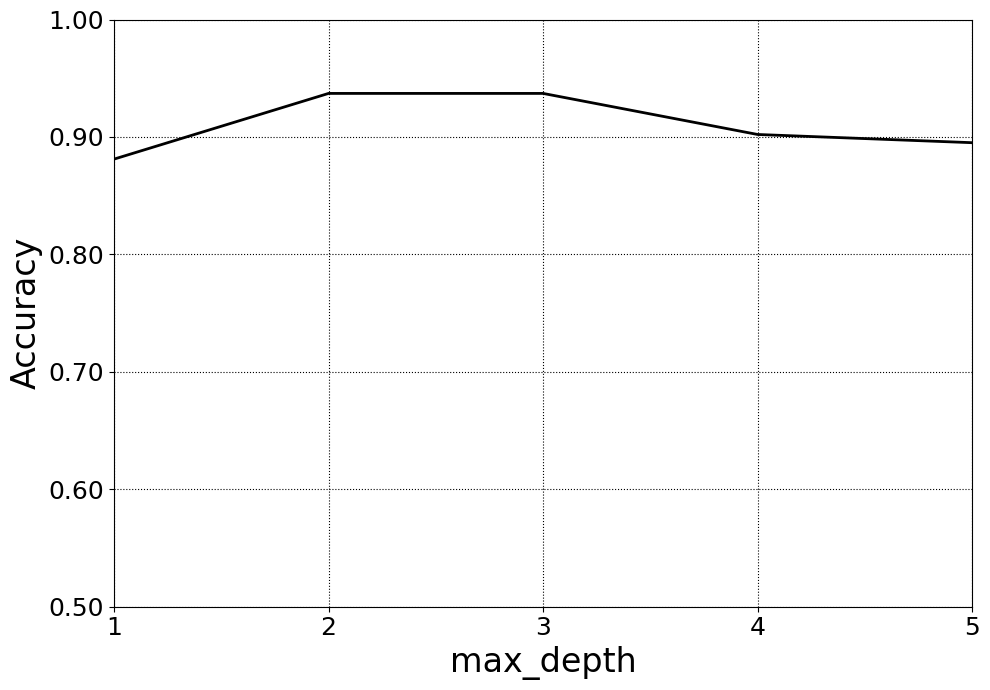

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()

# Figure below shows high accuracy is achieved for max_depth of 2 or 3

In [65]:
# Create a Decision Tree model with max_depth 2
clf = DecisionTreeClassifier(
                              max_depth = 2,
                              random_state = 0,
                              # max_leaf_nodes = 100
                             )

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [66]:
# Model performance
score = clf.score(X_test, y_test)
print(score)

0.9370629370629371


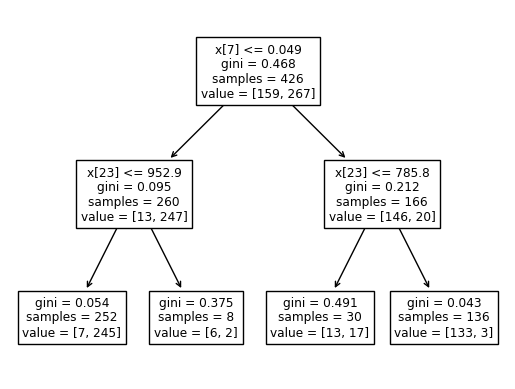

In [67]:
# Visualize the Decision Tree
plot_tree(clf);

1. Use your training data to train a Random Forest using RandomForestClassifier.
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [69]:
# Train random forest model

rfc = RandomForestClassifier(n_estimators=100, random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [70]:
# Extract feature importances
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [71]:
# Print feature importance
print(importances)

                    feature  importance
22          worst perimeter       0.124
27     worst concave points       0.121
7       mean concave points       0.118
23               worst area       0.098
20             worst radius       0.090
6            mean concavity       0.076
2            mean perimeter       0.058
0               mean radius       0.057
3                 mean area       0.038
13               area error       0.028
26          worst concavity       0.026
10             radius error       0.022
21            worst texture       0.020
1              mean texture       0.016
25        worst compactness       0.015
24         worst smoothness       0.011
28           worst symmetry       0.011
29  worst fractal dimension       0.009
12          perimeter error       0.008
19  fractal dimension error       0.007
17     concave points error       0.007
4           mean smoothness       0.006
15        compactness error       0.006
16          concavity error       0.005
